In [112]:
import rasterio
from pathlib import Path
import numpy as np
import rvt.vis
import rvt.default
import rvt.blend
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib as mpl
from rvt.blend_func import normalize_image

# Prepare image

In [2]:
src_pth = r"c:\test_data\SLRM\BAR_dem_05m_SLRM_R20.tif"
src_pth = Path(src_pth)

In [4]:
with rasterio.open(src_pth) as src:
    array = src.read()
    profile = src.profile

In [67]:
slrm_im = rvt.vis.slrm(array.squeeze(), radius_cell=20)

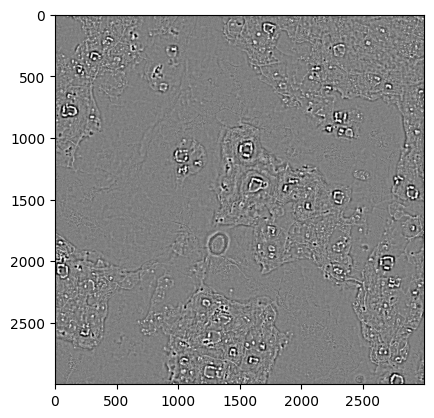

In [103]:
norm_threshold = 3

slrm = normalize_image(
    visualization="slrm",
    image=slrm_im,
    min_norm=-norm_threshold,
    max_norm=norm_threshold,
    normalization="value"
)
plt.imshow(slrm, cmap="gray")

# Creating custom colormap

## LinearSegmentedColormap -> from_list

test with RGB values

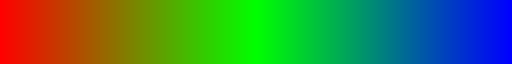

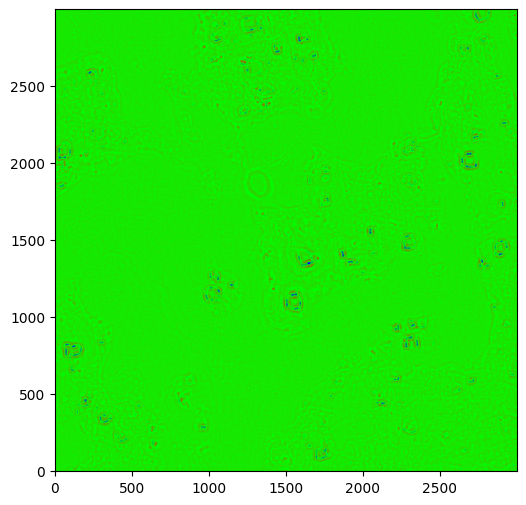

In [81]:
cmap_name = 'my_list'
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect=1)
im = ax.imshow(slrm, origin='lower', cmap=cmap)
cmap

## LinearSegmentedColormap with custom `cdict`

In [80]:
cdict1 = {
    'red': (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 0.1),
        (1.0, 1.0, 1.0),
    ),
    'green': (
        (0.0, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    ),
    'blue': (
        (0.0, 0.0, 1.0),
        (0.5, 0.1, 0.0),
        (1.0, 0.0, 0.0),
    )
}
blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

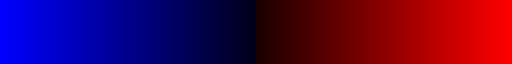

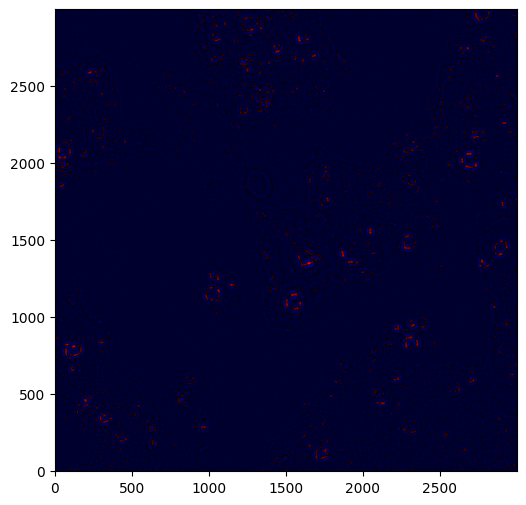

In [79]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(aspect=1)
im = ax.imshow(slrm, origin='lower', cmap=blue_red1)
blue_red1

## My RGB VALUES are:

| HEX | RGB | RGB % |
| :- | :- | :-  |
| 509d9f  |  80, 157, 159  | 	0.314, 0.616, 0.624 |
| 909090  |  144, 144, 144 |   0.565, 0.565, 0.565 |
| f3f2ac  |  243, 242, 172 |   0.953, 0.949, 0.675 |

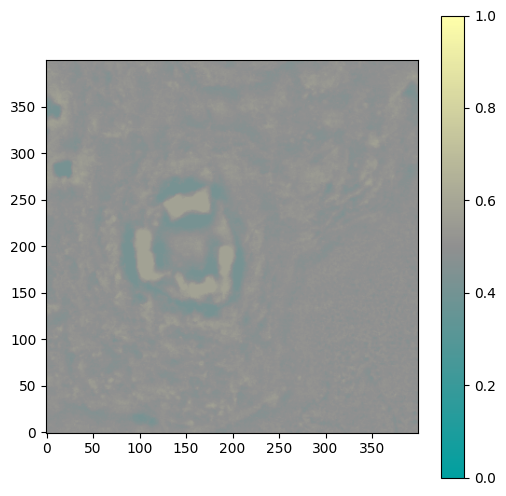

In [110]:
cmap_name = 'new_colormap'
colors = [(0,0.62745098039215685,0.62745098039215685), (0.56470588235294117,0.56470588235294117,0.56470588235294117), (1,1,0.66666666666666663)]
cmap = LinearSegmentedColormap.from_list(cmap_name, colors)
ccw_cmap = ListedColormap(interpolate_hsv_hue(start_hue, end_hue, n_colors=n, ccw=True))

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect=1)
im = ax.imshow(slrm[900:1300, 1400:1800], origin='lower', cmap=cmap, vmin=0, vmax=1)
fig.colorbar(im, ax=ax)

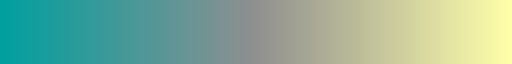

In [111]:
cmap

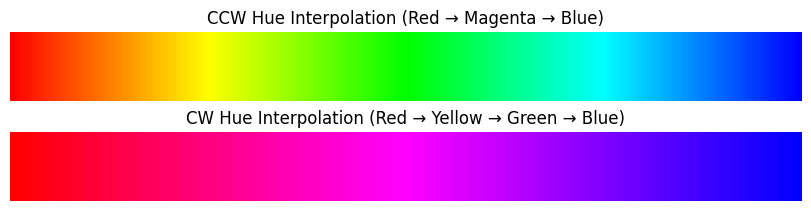

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, hsv_to_rgb

def interpolate_hsv_hue(start_hue, end_hue, n_colors=256, ccw=True):
    """Interpolate hue in HSV color space in clockwise or counter-clockwise direction"""
    if ccw and end_hue < start_hue:
        end_hue += 1  # wrap around ccw
    if not ccw and end_hue > start_hue:
        end_hue -= 1  # wrap around cw

    hues = np.linspace(start_hue, end_hue, n_colors) % 1.0
    sats = np.ones(n_colors)
    vals = np.ones(n_colors)
    hsv = np.stack([hues, sats, vals], axis=1)
    return hsv_to_rgb(hsv)

# Red to Blue (0° to 240°)
start_hue = 0 / 360       # Red
end_hue = 240 / 360       # Blue

n = 256
ccw_cmap = ListedColormap(interpolate_hsv_hue(start_hue, end_hue, n_colors=n, ccw=True))
cw_cmap = ListedColormap(interpolate_hsv_hue(start_hue, end_hue, n_colors=n, ccw=False))

# Dummy data for colorbar
gradient = np.linspace(0, 1, n).reshape(1, -1)

fig, axes = plt.subplots(2, 1, figsize=(8, 2), constrained_layout=True)

# CCW Colorbar
axes[0].imshow(gradient, aspect='auto', cmap=ccw_cmap)
axes[0].set_title("CCW Hue Interpolation (Red → Magenta → Blue)")
axes[0].axis("off")

# CW Colorbar
axes[1].imshow(gradient, aspect='auto', cmap=cw_cmap)
axes[1].set_title("CW Hue Interpolation (Red → Yellow → Green → Blue)")
axes[1].axis("off")

plt.show()


In [115]:
array.shape

(1, 3000, 3000)

In [67]:
slrm_im = rvt.vis.slrm(array.squeeze(), radius_cell=20)

In [ ]:
# Calculate SLRM

In [113]:
new_blend_combination = rvt.blend.BlenderCombination()

In [ ]:
new_blend_combination.create_layer(
    vis_method="SLRM",
    normalization="Value",
    minimum=-3,
    maximum=3,
    blend_mode="Normal",
    opacity=100,
    colormap="Reds_r", min_colormap_cut=0, max_colormap_cut=1,
    image=dict_arrays['slrm'].squeeze()
)